In [1]:
import pandas as pd

train = '/home/yashkrishan/Downloads/train.csv'
test = '/home/yashkrishan/Downloads/test.csv'

data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

combine = [data_train, data_test]

data_train.columns

data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [2]:
data_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(data_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

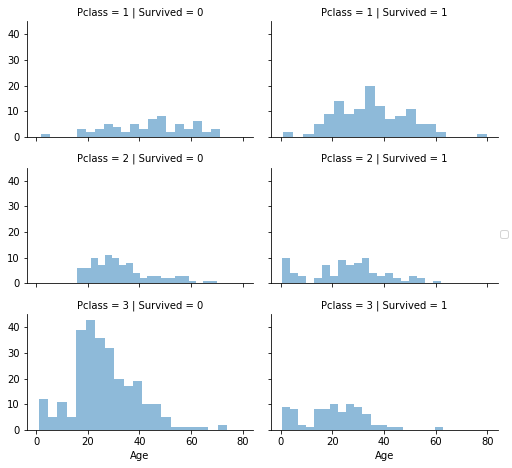

In [4]:
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


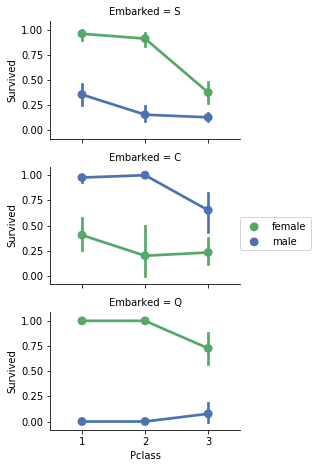

In [5]:
grid= sns.FacetGrid(data_train, row='Embarked', size =2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

In [6]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
        
pd.crosstab(data_train['Title'], data_train['Sex'])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [7]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    
data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [8]:
title_map = {"Mr":1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_map)
    dataset['TItle'] = dataset['Title'].fillna(0)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TItle
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [9]:
data_train = data_train.drop(['Name', 'PassengerId'], axis=1)
data_test = data_test.drop(['Name'], axis=1)
combine = [data_train, data_test]

In [10]:
for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0})
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TItle
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1,1


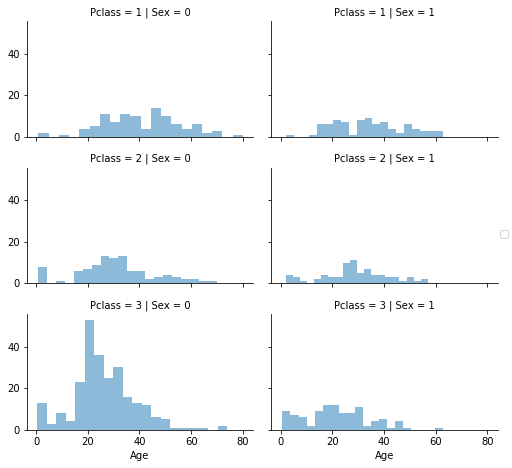

In [11]:
grid = sns.FacetGrid(data_train, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [12]:
import numpy as np
guess_ages = np.zeros((2,3))

In [13]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex == i)&(dataset.Pclass == j+1),'Age']=guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TItle
0,0,3,0,22,1,0,A/5 21171,7.2500,NaN,S,1,1
1,1,1,1,38,1,0,PC 17599,71.2833,C85,C,3,3
2,1,3,1,26,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2
3,1,1,1,35,1,0,113803,53.1000,C123,S,3,3
4,0,3,0,35,0,0,373450,8.0500,NaN,S,1,1


In [14]:
data_train['AgeBand'] = pd.cut(data_train['Age'], 5)
data_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [15]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,TItle,AgeBand
0,0,3,0,1,1,0,A/5 21171,7.2500,NaN,S,1,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,PC 17599,71.2833,C85,C,3,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,113803,53.1000,C123,S,3,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,373450,8.0500,NaN,S,1,1,"(32.0, 48.0]"


In [16]:
data_train = data_train.drop(['AgeBand'],axis=1)
combine = [data_train,data_test]

In [17]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp']+dataset['Parch']+1
data_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)
data_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,TItle,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,2.133558,0.523008,0.381594,32.204208,1.728395,1.728395,1.904602
std,0.486592,0.836071,0.477990,7.615265,1.102743,0.806057,49.693429,1.030039,1.030039,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,7.910400,1.000000,1.000000,1.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,14.454200,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,2.000000,1.000000,0.000000,31.000000,2.000000,2.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,5.000000,5.000000,11.000000


In [18]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
data_train[['IsAlone', 'Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [19]:
data_train = data_train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
data_test = data_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [data_train, data_test]
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,TItle,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,1,2,PC 17599,71.2833,C85,C,3,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,S,2,2,1
3,1,1,1,2,113803,53.1000,C123,S,3,3,0
4,0,3,0,2,373450,8.0500,NaN,S,1,1,1


In [20]:
freq_port = data_train.Embarked.dropna().mode()[0]
freq_port

'S'

In [21]:
for dataset in combine:
    
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,TItle,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,S,1,1,0
1,1,1,1,2,PC 17599,71.2833,C85,C,3,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,S,2,2,1
3,1,1,1,2,113803,53.1000,C123,S,3,3,0
4,0,3,0,2,373450,8.0500,NaN,S,1,1,1


In [22]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,TItle,IsAlone
0,0,3,0,1,A/5 21171,7.2500,NaN,0,1,1,0
1,1,1,1,2,PC 17599,71.2833,C85,1,3,3,0
2,1,3,1,1,STON/O2. 3101282,7.9250,NaN,0,2,2,1
3,1,1,1,2,113803,53.1000,C123,0,3,3,0
4,0,3,0,2,373450,8.0500,NaN,0,1,1,1


In [23]:
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)
data_test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,TItle,IsAlone
0,892,3,0,2,330911,7.8292,NaN,2,1,1,1
1,893,3,1,2,363272,7.0000,NaN,0,3,3,0
2,894,2,0,3,240276,9.6875,NaN,2,1,1,1
3,895,3,0,1,315154,8.6625,NaN,0,1,1,1
4,896,3,1,1,3101298,12.2875,NaN,0,3,3,0


In [24]:
data_train['FareBand'] = pd.qcut(data_train['Fare'], 4)
data_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
data_train = data_train.drop(["Ticket","Cabin"],)

In [25]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

data_train = data_train.drop(['FareBand'], axis=1)
combine = [data_train, data_test]
data_train.head(10)

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,TItle,IsAlone
0,0,3,0,1,A/5 21171,0,NaN,0,1,1,0
1,1,1,1,2,PC 17599,3,C85,1,3,3,0
2,1,3,1,1,STON/O2. 3101282,1,NaN,0,2,2,1
3,1,1,1,2,113803,3,C123,0,3,3,0
4,0,3,0,2,373450,1,NaN,0,1,1,1
5,0,3,0,1,330877,1,NaN,2,1,1,1
6,0,1,0,3,17463,3,E46,0,1,1,1
7,0,3,0,0,349909,2,NaN,0,4,4,0
8,1,3,1,1,347742,1,NaN,0,3,3,0
9,1,2,1,0,237736,2,NaN,1,3,3,0


In [29]:
X_train = data_train.drop("Survived",axis=1)
Y_train = data_train["Survived"]
X_pred = data_test.drop("PassengerId",axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_pred)
acc_log = round(model.score(X_train, Y_train) * 100, 2)
acc_log

In [ ]:
coeff_df = pd.DataFrame(data_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(model.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

"""svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_pred)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc"""
dct.fit(X_train, Y_train)
Y = dct.pedict(X_pred)
acc_dct = round(ct.score(X_train,Y_train)*100,2)
acc_dct

In [ ]:
submission = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)